In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

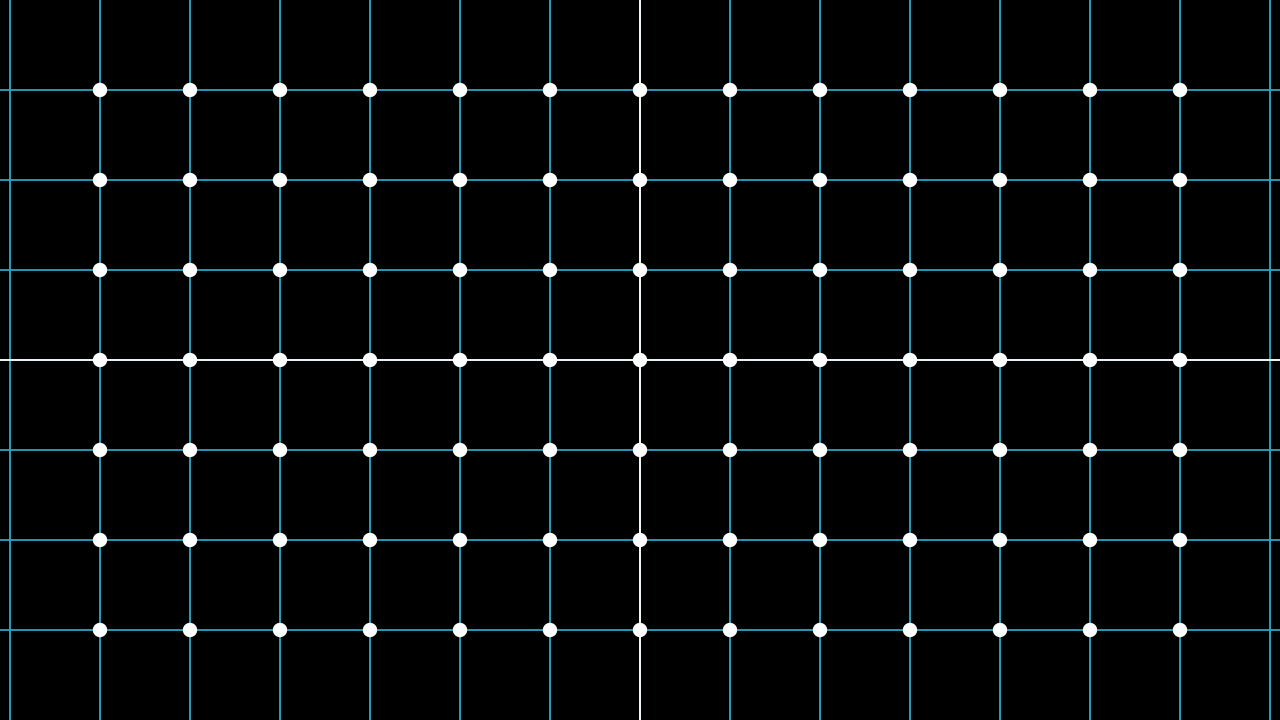

In [5]:
%%manim -qm -v WARNING Ex1

class Ex1(Scene):
    def setup(self):
        self.add(NumberPlane())
    
    def construct(self):
        x_range = range(-6,6+1)
        y_range = range(-3,3+1)

        # using list comprehension
        dots = [
            Dot([x,y,0])
            for x in x_range
            for y in y_range
        ]

        self.add(*dots)

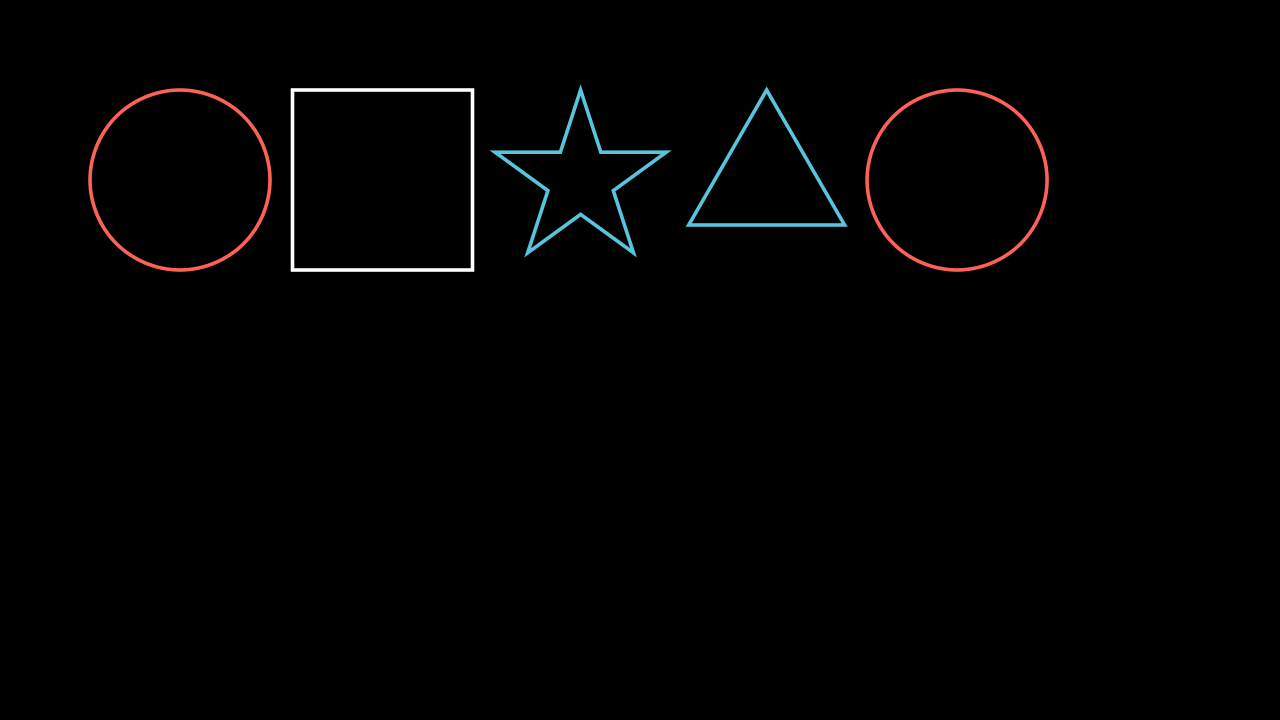

In [6]:
%%manim -qm -v WARNING Ex2

class Ex2(Scene):
    def construct(self):
        circle = Circle()\
            .to_corner(UL,buff=1)

        mobs = [circle,Square(),Star(),Triangle(),Circle()]

        for i in range(len(mobs)-1):
            mobs[i+1].next_to(mobs[i],RIGHT,aligned_edge=UP)

        self.add(*mobs)

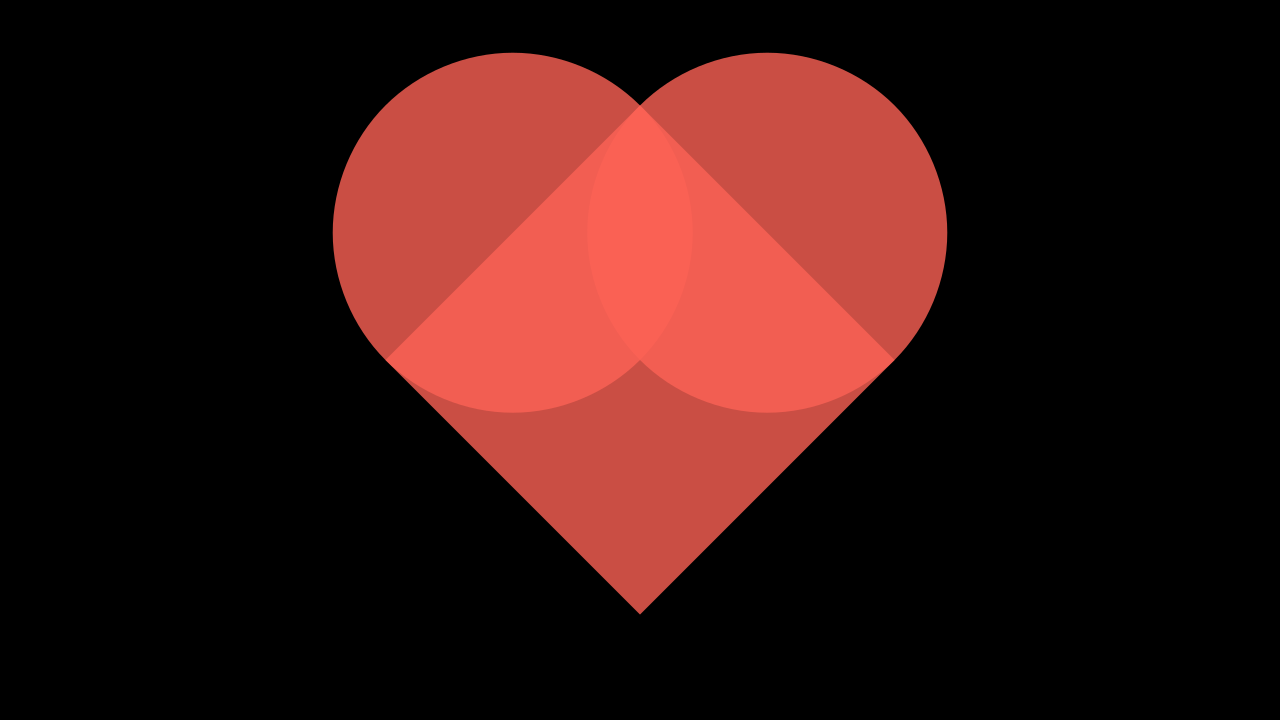

In [7]:
%%manim -qm -v WARNING Ex3


class Ex3(Scene):
    def construct(self):
        fig_kwargs = {"color": RED, "fill_opacity": 0.8, "stroke_width": 0}
        left_circle = Circle(**fig_kwargs).set(height=4)
        right_circle = left_circle.copy()
        square = Square(**fig_kwargs).set(height=4)

        left_circle.shift(LEFT*2)
        right_circle.shift(UP*2)

        pivot_kwargs = {"angle":-PI/4, "about_point": square.get_center()}

        square.rotate(**pivot_kwargs)
        left_circle.rotate(**pivot_kwargs)
        right_circle.rotate(**pivot_kwargs)

        self.add(square,left_circle,right_circle)

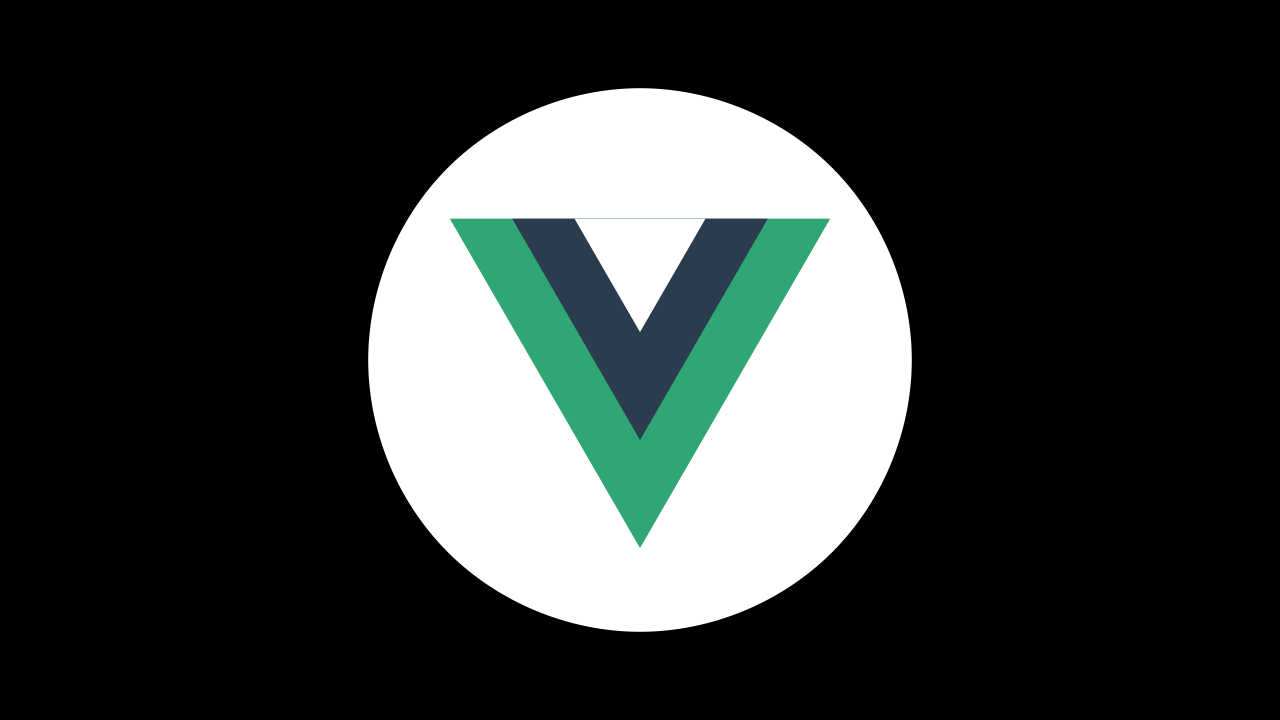

In [8]:
%%manim -qm -v WARNING Ex4

class Ex4(Scene):
    def construct(self):
        fig_kwargs = {"fill_opacity": 1}
        circle = Circle(color=WHITE,**fig_kwargs).scale(3)

        big_triangle = Triangle(color="#2FA673",**fig_kwargs).scale(2.4)
        big_triangle.rotate(PI,about_point=ORIGIN)

        mid_triangle = big_triangle.copy()
        mid_triangle.scale(2/3,about_edge=UP).set_color("#2A3C4E")

        small_triangle = big_triangle.copy()
        small_triangle.scale(1/3,about_edge=UP).set_color(WHITE)



        self.add(circle,big_triangle,mid_triangle,small_triangle)

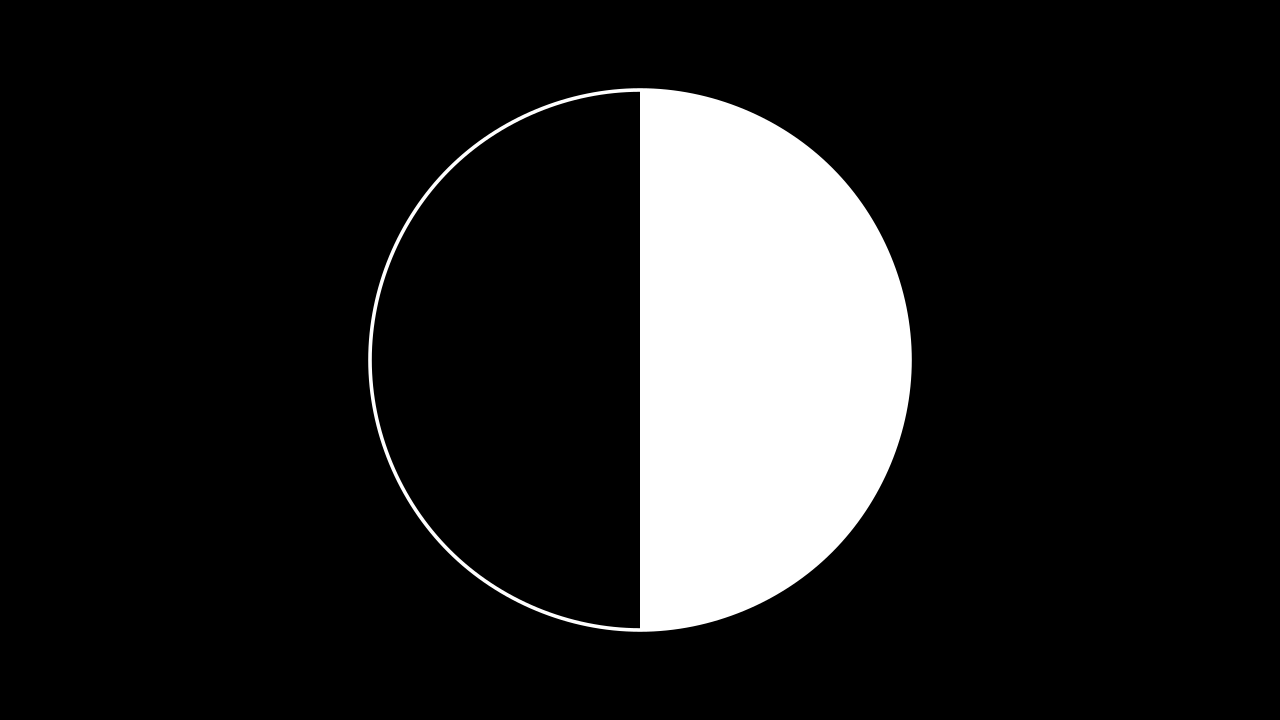

In [16]:
%%manim -qm -v WARNING Ex5

class Ex5(Scene):
    def construct(self):
        fig_kwargs = {"fill_opacity": 1, "stroke_width": 0, "color": WHITE}
        big_circle = Circle(color=WHITE).set(height=6)

        semi_circle = VMobject(**fig_kwargs).set_points(
            big_circle.points[:int(len(big_circle.points)/2)]
        )

        semi_circle.rotate(-PI/2,about_point=ORIGIN)

        up_black_circle = Circle(**fig_kwargs).set_color(BLACK)
        up_black_circle.set(height=3)
        up_black_circle.move_to(UP*3/2)

        down_white_circle = up_black_circle.copy()
        down_white_circle.set_color(WHITE)
        down_white_circle.move_to(-UP*3/2)

        small_black_circle = down_white_circle.copy()
        small_black_circle.set_color(BLACK).scale(0.3)

        small_white_circle = up_black_circle.copy()
        small_white_circle.set_color(WHITE).scale(0.3)

        self.add(
            semi_circle,
            # up_black_circle,down_white_circle,
            # small_black_circle,small_white_circle,
            big_circle
        )

In [18]:
ri = "-s --disable_caching -v WARNING Example"
rv = "-qm --disable_caching -v WARNING Example"

In [20]:
class MyScene(Scene):
    def setup(self):
        self.number_plane = NumberPlane(axis_config={"include_numbers": True})
        self.add(self.number_plane)

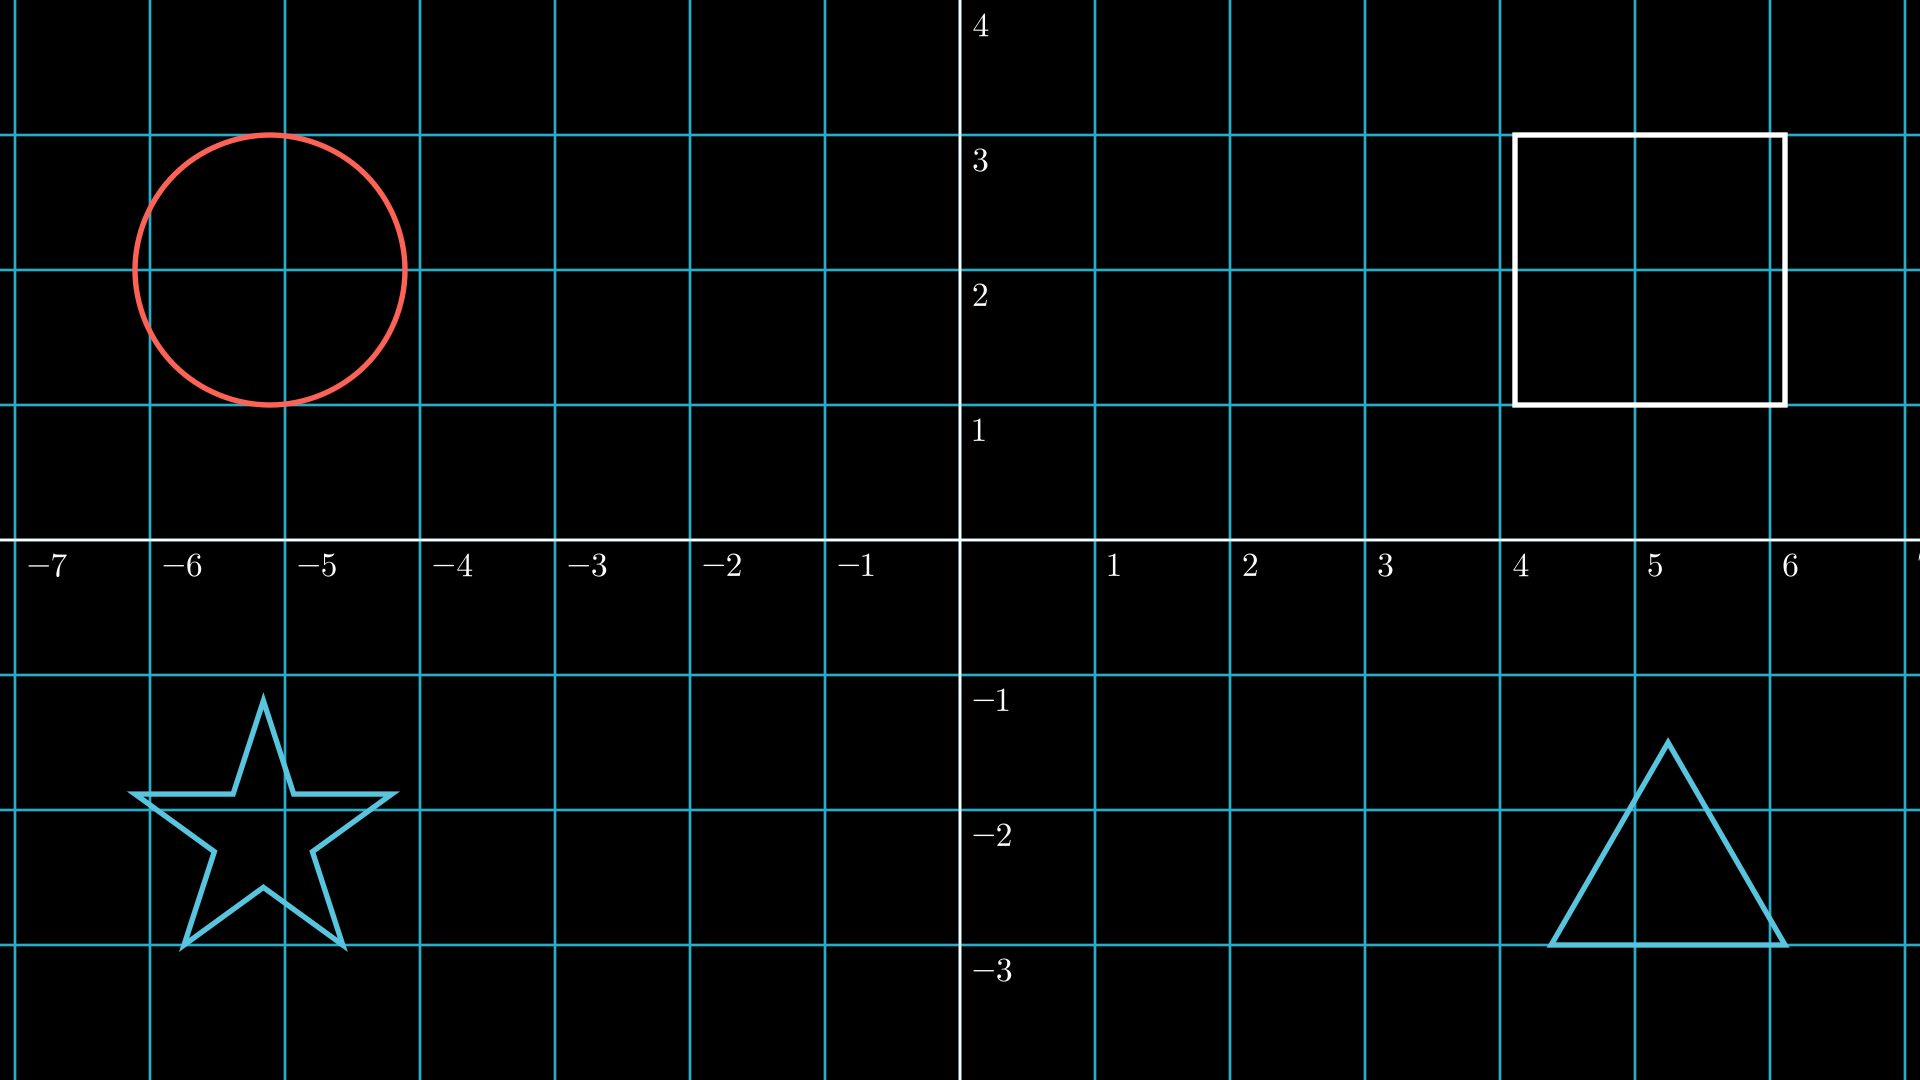

In [21]:
%%manim $ri

class Example(MyScene):
    def construct(self):
        grp = [Square(), Circle(), Star(), Triangle()]
        corner_vectors = [UR, UL, DL, DR]

        for mob,cv in zip(grp,corner_vectors):
            mob.to_corner(cv,buff=1)

        self.add(*grp)

In [22]:
%%manim $rv

class Example(MyScene):
    def construct(self):
        grp = [Square(), Circle(), Star(), Triangle()]
        corner_vectors = [UR, UL, DL, DR]

        self.add(*grp)

        for mob,cv in zip(grp,corner_vectors):
            self.play(mob.animate.to_corner(cv,buff=1))
            self.wait(0.2)
        self.wait()


In [24]:
%%manim -qm --disable_caching -v WARNING Example2

class Example2(MyScene):
    def construct(self):
        grp = [Square(), Circle(), Star(), Triangle()]
        corner_vectors = [UR, UL, DL, DR]

        self.add(*grp)

        self.play(
            *[
                mob.animate.to_corner(cv,buff=1)
                for mob,cv in zip(grp,corner_vectors) 
            ],
            run_time=2
        )
        self.wait()